In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Preparing data

### Acknowledgements

The dataset used here have been acquired from https://www.kaggle.com/andrewmvd/udemy-courses.

In [2]:
df = pd.read_csv('data/udemy_courses.csv')

In [3]:
df.head()

course_id                                       course_title  \
0    1070968                 Ultimate Investment Banking Course   
1    1113822  Complete GST Course & Certification - Grow You...   
2    1006314  Financial Modeling for Business Analysts and C...   
3    1210588  Beginner to Pro - Financial Analysis in Excel ...   
4    1011058       How To Maximize Your Profits Trading Options   

                                                 url  is_paid  price  \
0  https://www.udemy.com/ultimate-investment-bank...     True    200   
1      https://www.udemy.com/goods-and-services-tax/     True     75   
2  https://www.udemy.com/financial-modeling-for-b...     True     45   
3  https://www.udemy.com/complete-excel-finance-c...     True     95   
4  https://www.udemy.com/how-to-maximize-your-pro...     True    200   

   num_subscribers  num_reviews  num_lectures               level  \
0             2147           23            51          All Levels   
1             2792          923           274          All Levels   
2             2174           74            51  Intermediate Level   
3             2451           11            36          All Levels   
4             1276           45            26  Intermediate Level   

   content_duration   published_timestamp           subject  
0               1.5  2017-01-18T20:58:58Z  Business Finance  
1              39.0  2017-03-09T16:34:20Z  Business Finance  
2               2.5  2016-12-19T19:26:30Z  Business Finance  
3               3.0  2017-05-30T20:07:24Z  Business Finance  
4               2.0  2016-12-13T14:57:18Z  Business Finance

In [4]:
print("Number of Instances:",df.shape[0])
print("Number of Features:",df.shape[1])

Number of Instances: 3678
Number of Features: 12


In [5]:
df['level'].value_counts()

All Levels            1929
Beginner Level        1270
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

In [6]:
df['subject'].value_counts()

Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: subject, dtype: int64

In [7]:
df['is_paid'].value_counts()

True     3368
False     310
Name: is_paid, dtype: int64

In [8]:
df.describe()

course_id        price  num_subscribers   num_reviews  num_lectures  \
count  3.678000e+03  3678.000000      3678.000000   3678.000000   3678.000000   
mean   6.759720e+05    66.049483      3197.150625    156.259108     40.108755   
std    3.432732e+05    61.005755      9504.117010    935.452044     50.383346   
min    8.324000e+03     0.000000         0.000000      0.000000      0.000000   
25%    4.076925e+05    20.000000       111.000000      4.000000     15.000000   
50%    6.879170e+05    45.000000       911.500000     18.000000     25.000000   
75%    9.613555e+05    95.000000      2546.000000     67.000000     45.750000   
max    1.282064e+06   200.000000    268923.000000  27445.000000    779.000000   

       content_duration  
count       3678.000000  
mean           4.094517  
std            6.053840  
min            0.000000  
25%            1.000000  
50%            2.000000  
75%            4.500000  
max           78.500000

In [9]:
df.dtypes

course_id                int64
course_title            object
url                     object
is_paid                   bool
price                    int64
num_subscribers          int64
num_reviews              int64
num_lectures             int64
level                   object
content_duration       float64
published_timestamp     object
subject                 object
dtype: object

We prefer work with int or float values instead objet or bool values

In [10]:
#turn bool values(True/False) into int values(1/0)
df *= 1
df.dtypes

course_id                int64
course_title            object
url                     object
is_paid                  int64
price                    int64
num_subscribers          int64
num_reviews              int64
num_lectures             int64
level                   object
content_duration       float64
published_timestamp     object
subject                 object
dtype: object

In [11]:
100*df.isnull().sum()/df.shape[0]

course_id              0.0
course_title           0.0
url                    0.0
is_paid                0.0
price                  0.0
num_subscribers        0.0
num_reviews            0.0
num_lectures           0.0
level                  0.0
content_duration       0.0
published_timestamp    0.0
subject                0.0
dtype: float64

In [13]:
#turn object values into int values, assign each class a int/float number

conditions = [df['level'] == 'All Levels',
              df['level'] == 'Beginner Level',
              df['level'] == 'Intermediate Level',
              df['level'] == 'Expert Level']
choices = [0,1,2,3]

df['int_level'] = np.select(conditions, choices, default=np.nan)
df

course_id                                       course_title  \
0       1070968                 Ultimate Investment Banking Course   
1       1113822  Complete GST Course & Certification - Grow You...   
2       1006314  Financial Modeling for Business Analysts and C...   
3       1210588  Beginner to Pro - Financial Analysis in Excel ...   
4       1011058       How To Maximize Your Profits Trading Options   
...         ...                                                ...   
3673     775618  Learn jQuery from Scratch - Master of JavaScri...   
3674    1088178  How To Design A WordPress Website With No Codi...   
3675     635248                      Learn and Build using Polymer   
3676     905096  CSS Animations: Create Amazing Effects on Your...   
3677     297602  Using MODX CMS to Build Websites: A Beginner's...   

                                                    url  is_paid  price  \
0     https://www.udemy.com/ultimate-investment-bank...        1    200   
1         https://www.udemy.com/goods-and-services-tax/        1     75   
2     https://www.udemy.com/financial-modeling-for-b...        1     45   
3     https://www.udemy.com/complete-excel-finance-c...        1     95   
4     https://www.udemy.com/how-to-maximize-your-pro...        1    200   
...                                                 ...      ...    ...   
3673  https://www.udemy.com/easy-jquery-for-beginner...        1    100   
3674  https://www.udemy.com/how-to-make-a-wordpress-...        1     25   
3675  https://www.udemy.com/learn-and-build-using-po...        1     40   
3676  https://www.udemy.com/css-animations-create-am...        1     50   
3677  https://www.udemy.com/using-modx-cms-to-build-...        1     45   

      num_subscribers  num_reviews  num_lectures               level  \
0                2147           23            51          All Levels   
1                2792          923           274          All Levels   
2                2174           74            51  Intermediate Level   
3                2451           11            36          All Levels   
4                1276           45            26  Intermediate Level   
...               ...          ...           ...                 ...   
3673             1040           14            21          All Levels   
3674              306            3            42      Beginner Level   
3675              513          169            48          All Levels   
3676              300           31            38          All Levels   
3677              901           36            20      Beginner Level   

      content_duration   published_timestamp           subject  int_level  
0                  1.5  2017-01-18T20:58:58Z  Business Finance        0.0  
1                 39.0  2017-03-09T16:34:20Z  Business Finance        0.0  
2                  2.5  2016-12-19T19:26:30Z  Business Finance        2.0  
3                  3.0  2017-05-30T20:07:24Z  Business Finance        0.0  
4                  2.0  2016-12-13T14:57:18Z  Business Finance        2.0  
...                ...                   ...               ...        ...  
3673               2.0  2016-06-14T17:36:46Z   Web Development        0.0  
3674               3.5  2017-03-10T22:24:30Z   Web Development        1.0  
3675               3.5  2015-12-30T16:41:42Z   Web Development        0.0  
3676               3.0  2016-08-11T19:06:15Z   Web Development        0.0  
3677               2.0  2014-09-28T19:51:11Z   Web Development        1.0  

[3678 rows x 13 columns]

In [14]:
#we created a new feature
df.dtypes

course_id                int64
course_title            object
url                     object
is_paid                  int64
price                    int64
num_subscribers          int64
num_reviews              int64
num_lectures             int64
level                   object
content_duration       float64
published_timestamp     object
subject                 object
int_level              float64
dtype: object

In [15]:
#delete repeated features
df.drop('level',axis=1, inplace=True)
df.dtypes

course_id                int64
course_title            object
url                     object
is_paid                  int64
price                    int64
num_subscribers          int64
num_reviews              int64
num_lectures             int64
content_duration       float64
published_timestamp     object
subject                 object
int_level              float64
dtype: object

In [16]:
df.shape

(3678, 12)

In [17]:
#delete irrelevant features
df.drop('url', axis=1, inplace=True)
df.shape

(3678, 11)

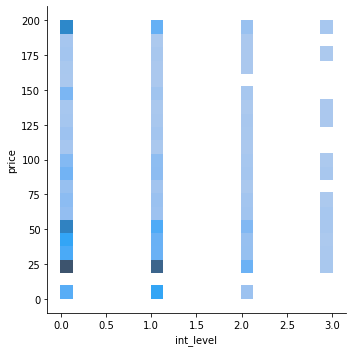

In [18]:
sns.displot(x='int_level',y='price',data=df)

0 correspond to All levels

1 correspond to Beginner Level

2 correspond to Intermediate Level

3 correspond to Expert Level

The graph show us how distributed are the courses in relation price/level


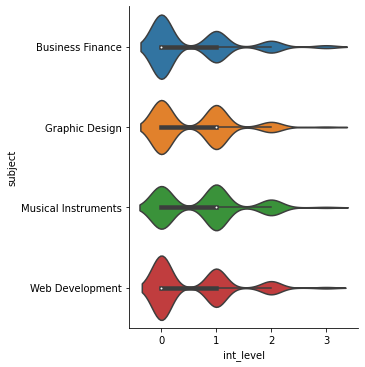

In [28]:
sns.catplot(data=df, kind='violin', x='int_level',y='subject')